# K-means 실습

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## K-means 파라미터 정리

- n_clusters : 최종적으로 군집화할 갯수
- init : 초기 군집 중심점 좌표설정방식. 랜덤으로 설정하면 반복횟수가 너무 많아져 보통 'k-means++' 알고리즘 사용
- max_iter : 반복횟수(설정값 이전에 중심 이동 변화없으면 반복 종료)

In [3]:
# K-means 객체 생성하고 군집화 수행
kmeans = KMeans(n_clusters=3, init='k-means++',
               max_iter=300, random_state=42)
kmeans.fit(iris_df)

KMeans(n_clusters=3, random_state=42)

In [5]:
# transform 역할은 뭐지?
kmeans.fit_transform(iris_df)

array([[3.41925061, 0.14135063, 5.0595416 ],
       [3.39857426, 0.44763825, 5.11494335],
       [3.56935666, 0.4171091 , 5.27935534],
       [3.42240962, 0.52533799, 5.15358977],
       [3.46726403, 0.18862662, 5.10433388],
       [3.14673162, 0.67703767, 4.68148797],
       [3.51650264, 0.4151867 , 5.21147652],
       [3.33654987, 0.06618157, 5.00252706],
       [3.57233779, 0.80745278, 5.32798107],
       [3.3583767 , 0.37627118, 5.06790865],
       [3.32449131, 0.4824728 , 4.89806763],
       [3.31126872, 0.25373214, 4.9966845 ],
       [3.46661272, 0.50077939, 5.19103612],
       [3.90578362, 0.91322505, 5.65173594],
       [3.646649  , 1.01409073, 5.10804455],
       [3.49427881, 1.20481534, 4.88564095],
       [3.495248  , 0.6542018 , 5.03090587],
       [3.38444981, 0.1441527 , 5.02342022],
       [3.11245944, 0.82436642, 4.61792995],
       [3.37738931, 0.38933276, 4.97213426],
       [3.07471224, 0.46344363, 4.6955761 ],
       [3.31506588, 0.3286031 , 4.9236821 ],
       [3.

In [6]:
# K-means 속성 값들 확인
# 클러스터링한 결과값들의 클러스터링 레이블 확인(단, 원본 데이터의 target값 label이랑 동일하지 않음!)
print(kmeans.labels_)
# predict함수는 클러스터링한 결과값을 반환하므로 fit함수 호출하고 labels_속성값과 동일한 결과물
print(kmeans.predict(iris_df))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [7]:
# 원본 데이터의 target값에 따라 clustering 어떻게 됬는지 확인
iris_df['cluster'] = kmeans.labels_
iris_df['target'] = iris.target
iris_result = iris_df.groupby(['target','cluster'])['sepal_length'].count()
iris_result

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

In [9]:
# 클러스터링한 결과를 PCA 적용 후에 시각화 해보기
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
iris_df['pca_1'] = pca_transformed[:,0]
iris_df['pca_2'] = pca_transformed[:,1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_1,pca_2
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


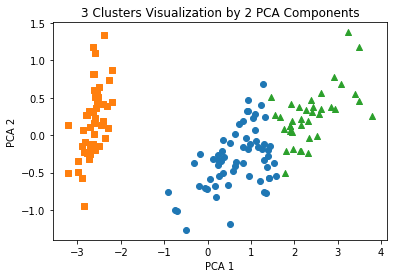

In [15]:
irisDF = iris_df.copy()
marker0_ind = iris_df[iris_df['cluster'] == 0].index
marker1_ind = iris_df[iris_df['cluster'] == 1].index
marker2_ind = iris_df[iris_df['cluster'] == 2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_1'], y=irisDF.loc[marker0_ind,'pca_2'], marker='o') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_1'], y=irisDF.loc[marker1_ind,'pca_2'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_1'], y=irisDF.loc[marker2_ind,'pca_2'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

# Clustering 알고리즘 테스트 위한 데이터 생성

- sklearn.datasets의 make_blobs 라이브러리 사용


- make_blobs 파라미터 정리
    * n_samples : 생성할 총 데이터 개수 (디폴트값은 100개)
    * n_features : 데이터 feature 개수. 시각화를 목표로 할경우 보통 2차원으로 설정하며 각 x축, y축으로 설정됨
    * centers : 
        - int값으로 넣어야 하며 클러스터링할 군집 개수를 의미
        - 만약 array형태로 넣는 다면 개별 군집간의 중심점의 좌표를 의미
    * cluster_std : 생성될 군집 데이터의 표준편차를 의미
        - 만약 군집개수가 3개로 설정하고 [0.8, 0.1, 0.6]과 같이 입력하면 각 군집의 표준편차를 개별적으로 정의해준 것을 의미

In [25]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# X에는 데이터, y에는 클러스터링 된 label값 반환
X, y = make_blobs(n_samples=200, n_features=2, centers=3,
                 cluster_std=0.8, random_state=1)
print(X.shape, y.shape)

# y Target값 분포 확인
# return_counts=True 추가하면 array요소마다 value_counts()해줌
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [26]:
# 클러스터링용으로 생성한 데이터 데이터프레임으로 만들기
cluster_df = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
cluster_df['target'] = y
cluster_df.head()

,ftr1,ftr2,target
0,-7.729020,-8.857690,2
1,-10.943567,-4.485952,1
2,-7.510878,-7.401893,2
3,-9.811717,-3.407307,1
4,-5.597108,-7.701722,2


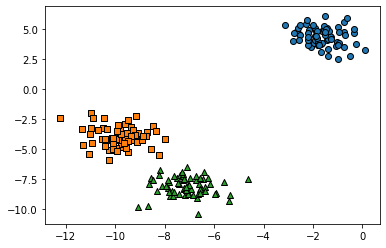

In [27]:
# 생성 데이터포인트들 시각화해보기
target_lst = np.unique(y)
markers = ['o','s','^','P','D']

for target in target_lst:
    target_cluster = cluster_df[cluster_df['target']==target]
    plt.scatter(x=target_cluster['ftr1'],
               y=target_cluster['ftr2'],
               edgecolor='k', marker=markers[target])
plt.show()

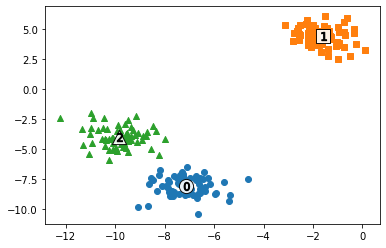

In [31]:
# K-means 클러스터링 수행하고 개별 클러스터 중심을 시각화

# 1.K-means 할당
kmeans = KMeans(n_clusters=3, init='k-means++',
               max_iter=200, random_state=12)
    # X는 cluster_df의 feature array임.
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels

# 2.K-means속성의 cluster_centers_는 개별 클러스터의 중심 위치 좌표를 반환
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','P']
# 3. label별로 루프돌아서 개별 클러스터링의 중심 시각화
for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label'] == label]
    # 각 클러스터의 중심 좌표 할당
    center_x_y = centers[label]
    # 각 클러스터 데이터들 시각화
    plt.scatter(x=label_cluster['ftr1'],
               y=label_cluster['ftr2'],
               marker=markers[label])
    
    # 각 클러스터의 중심 시각화
        # 중심 표현하는 모형 설정
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200,
               color='white', alpha=0.9, edgecolor='k',
               marker=markers[label])
        # 중심 표현하는 글자 설정
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70,
               color='k', edgecolor='k',
               marker='$%d$' % label)# label값에 따라 숫자로 표현한다는 의미
plt.show()
